importing pandas package

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('hawaii_enrollments.csv')

In [3]:
data = data[data.SPRADDR_ZIP_PR.map(str).map(len) == 5]
data.head()

,Unnamed: 0,SPRADDR_ZIP_PR,SEMESTER,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
0,0,96766,Fall 2012,Kaua`i Community College,73,2012
1,1,96814,Fall 2012,Kapi`olani Community College,19,2012
2,2,96792,Fall 2012,Leeward Community College,504,2012
3,3,96822,Fall 2012,Honolulu Community College,12,2012
4,4,96821,Fall 2012,Kapi`olani Community College,43,2012


1. aggregate all zip codes from 2014-2019 for the Manoa campus,

In [4]:
new_dataframe = data[(data.IRO_INSTITUTION_DESCL.str.contains('Manoa'))]

In [5]:
new_dataframe.head()

,Unnamed: 0,SPRADDR_ZIP_PR,SEMESTER,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
7,7,96789,Fall 2012,University of Hawai`i at Manoa,80,2012
8,8,96712,Fall 2012,University of Hawai`i at Manoa,37,2012
11,11,96813,Fall 2012,University of Hawai`i at Manoa,26,2012
12,12,96822,Fall 2012,University of Hawai`i at Manoa,87,2012
13,13,96816,Fall 2012,University of Hawai`i at Manoa,184,2012


In [6]:
new_dataframe = new_dataframe[(new_dataframe.YEAR >= 2014) & (new_dataframe.YEAR <= 2019)]

In [7]:
new_dataframe.head()

,Unnamed: 0,SPRADDR_ZIP_PR,SEMESTER,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
2487,2487,96817,Fall 2014,University of Hawai`i at Manoa,53,2014
2489,2489,96734,Fall 2014,University of Hawai`i at Manoa,127,2014
2491,2491,96779,Fall 2014,University of Hawai`i at Manoa,6,2014
2495,2495,96793,Fall 2014,University of Hawai`i at Manoa,16,2014
2496,2496,96791,Fall 2014,University of Hawai`i at Manoa,15,2014


2. assign a state code to the zip codes

In [8]:
df_zip = pd.read_csv("US.txt", header=None, sep='\t')

In [9]:
new_dataframe['SPRADDR_ZIP_PR'] = pd.to_numeric(new_dataframe['SPRADDR_ZIP_PR'], errors='coerce')
new_dataframe = new_dataframe.dropna(subset=['SPRADDR_ZIP_PR']).set_index('SPRADDR_ZIP_PR')
new_dataframe.head()
new_dataframe = new_dataframe.reset_index()

In [10]:
def getStateCode(k):
    try:
        k = df_zip[df_zip[1]==int(k)][4].item()
    except:
        pass
    return k

In [11]:
new_dataframe['SPRADDR_ZIP_PR'] = new_dataframe['SPRADDR_ZIP_PR'].astype(int).apply(getStateCode)

In [12]:
new_dataframe['SPRADDR_ZIP_PR'] = new_dataframe['SPRADDR_ZIP_PR'].astype(str)
new_dataframe['SPRADDR_ZIP_PR'] = new_dataframe['SPRADDR_ZIP_PR'][~new_dataframe['SPRADDR_ZIP_PR'].str.isnumeric()]
new_dataframe = new_dataframe.dropna()
new_dataframe.head()

,SPRADDR_ZIP_PR,Unnamed: 0,SEMESTER,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
0,HI,2487,Fall 2014,University of Hawai`i at Manoa,53,2014
1,HI,2489,Fall 2014,University of Hawai`i at Manoa,127,2014
2,HI,2491,Fall 2014,University of Hawai`i at Manoa,6,2014
3,HI,2495,Fall 2014,University of Hawai`i at Manoa,16,2014
4,HI,2496,Fall 2014,University of Hawai`i at Manoa,15,2014


3. get an aggregate count of all enrollment numbers by state from 2014-2019.

In [13]:
x = new_dataframe.groupby('SPRADDR_ZIP_PR').count()

In [14]:
x = x.reset_index()
x[['SPRADDR_ZIP_PR','ENROLLMENT']]

,SPRADDR_ZIP_PR,ENROLLMENT
0,AK,237
1,AL,51
2,AR,31
3,AZ,468
4,CA,8114
5,CO,800
6,DC,25
7,DE,13
8,FL,411
9,GA,172


Exporting that table to a CSV using DataFrame.to_csv('zip_code_summary.csv').

In [15]:
new_dataframe.to_csv('zip_code_summary.csv')

In [16]:
x = new_dataframe.groupby('SPRADDR_ZIP_PR')['ENROLLMENT'].mean().sort_values().tail(15)

<AxesSubplot:xlabel='SPRADDR_ZIP_PR'>

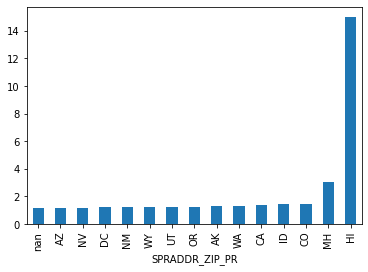

In [17]:
x.plot(kind='bar')